In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import gaussian_kde, norm, skew, kurtosis

In [28]:
df = pd.read_csv("data.csv", sep=";").rename(columns={"Приволжский федеральный округ": "Name"})

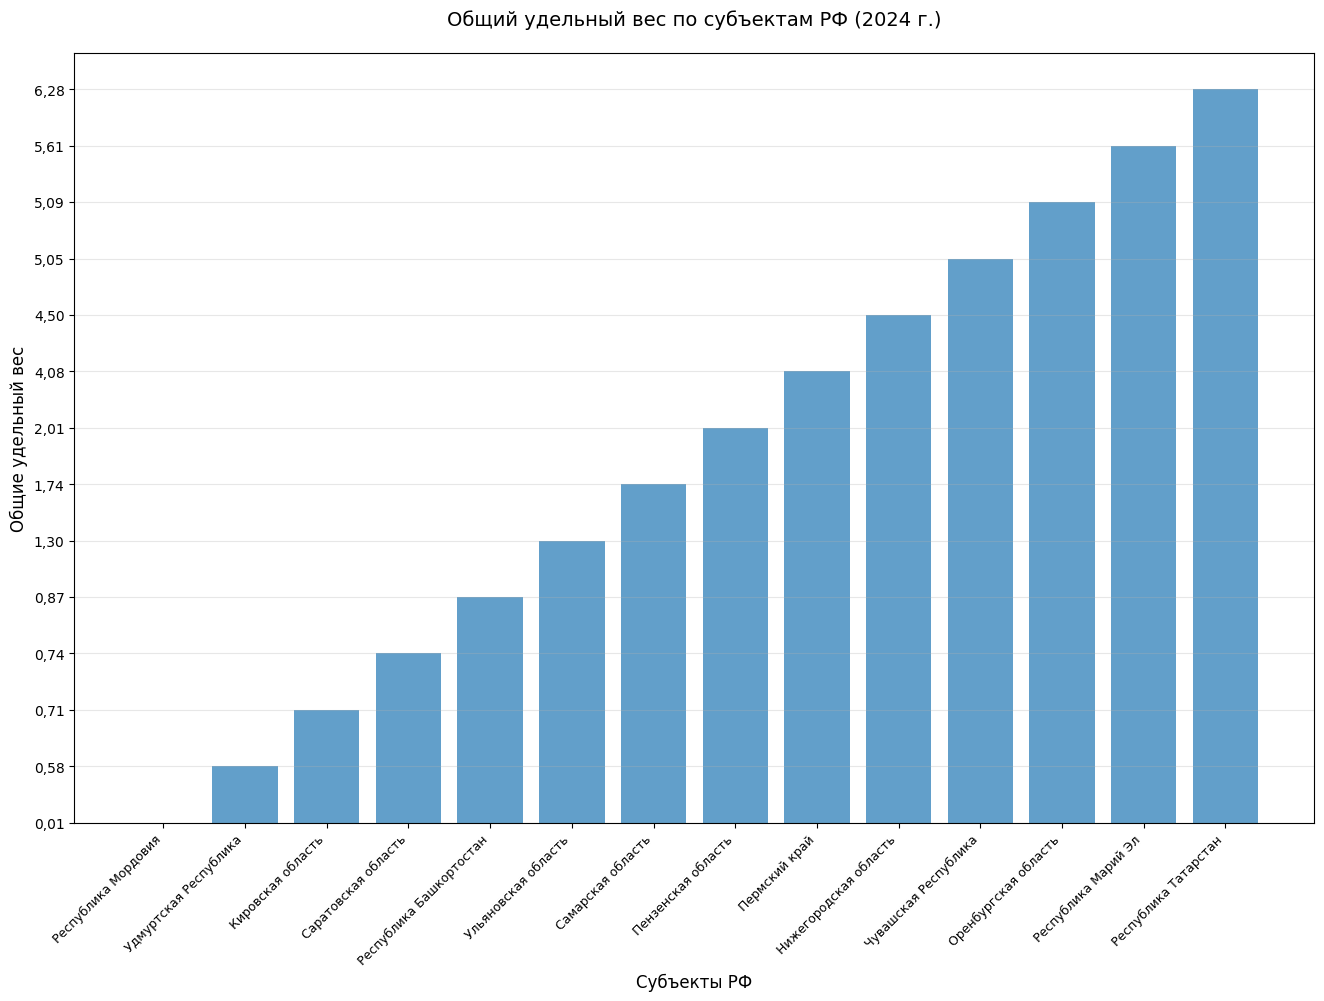

In [4]:
sorted_df = df.copy().sort_values('2024')

plt.figure(figsize=(16, 10))

bars = plt.bar(range(len(sorted_df)), sorted_df['2024'], alpha=0.7)

plt.xticks(range(len(sorted_df)), sorted_df['Name'], fontsize=9, rotation=45, ha='right')
plt.ylabel('Общие удельный вес', fontsize=12)
plt.xlabel('Субъекты РФ', fontsize=12)
plt.title('Общий удельный вес по субъектам РФ (2024 г.)', fontsize=14, pad=20)

plt.grid(axis='y', alpha=0.3)

plt.show()

In [31]:
def descriptive_stats(data):
    stats_innov = {}

    # Преобразуем данные в числовой формат (заменяем запятые на точки)
    if isinstance(data[0], str):
        data = [float(x.replace(',', '.')) for x in data]

    data = np.array(data)

    # 3.1 Среднее выборочное
    stats_innov['mean'] = np.mean(data)
    stats_innov['avg'] = np.average(data)

    # 3.2 Выборочная дисперсия
    stats_innov['var_biased'] = np.var(data)          # смещённая
    stats_innov['var_unbiased'] = np.var(data, ddof=1)  # несмещённая

    # 3.3 Среднеквадратичное отклонение
    stats_innov['std'] = np.sqrt(stats_innov['var_unbiased'])

    # 3.4 Медиана
    stats_innov['median'] = np.median(data)

    # 3.5 Выборочное абсолютное отклонение от медианы
    stats_innov['mad'] = np.mean(np.abs(data - stats_innov['median']))

    # 3.6 Квартили
    stats_innov['q1'] = np.percentile(data, 25)
    stats_innov['q2'] = np.percentile(data, 50)  # медиана
    stats_innov['q3'] = np.percentile(data, 75)

    # 3.7 Интерквартильная широта
    stats_innov['iqr'] = stats_innov['q3'] - stats_innov['q1']

    # 3.8 Полусумма выборочных квартилей
    stats_innov['q_mid'] = (stats_innov['q1'] + stats_innov['q3']) / 2

    # 3.9 Экстремальные элементы
    stats_innov['min'] = np.min(data)
    stats_innov['max'] = np.max(data)

    # 3.10 Размах выборки
    stats_innov['range'] = stats_innov['max'] - stats_innov['min']

    # 3.11 Полусумма экстремальных элементов
    stats_innov['mid_range'] = (stats_innov['min'] + stats_innov['max']) / 2

    # 3.12 Выборочная оценка асимметрии
    stats_innov['skewness'] = skew(data)

    # 3.13 Выборочная оценка эксцесса
    stats_innov['kurtosis'] = kurtosis(data)  # избыточный эксцесс (0 для нормального распределения)

    print(f"3.1. Среднее выборочное: {stats_innov['mean']:.1f}")
    print(f"3.2. Выборочная дисперсия:")
    print(f"\t- Смещенная: {stats_innov['var_biased']:.1f}")
    print(f"\t- Несмещенная: {stats_innov['var_unbiased']:.1f}")
    print(f"3.3. Выборочное среднее квадратичное отклонение: {stats_innov['std']:.1f}")
    print(f"3.4. Медиана: {stats_innov['median']:.1f}")
    print(f"3.5. Выборочное абсолютное отклонение: {stats_innov['mad']:.1f}")
    print(f"3.6. Квартили:")
    print(f"\t- Q1 (25-й процентиль): {stats_innov['q1']:.1f}")
    print(f"\t- Q2 (медиана): {stats_innov['q2']:.1f}")
    print(f"\t- Q3 (75-й процентиль): {stats_innov['q3']:.1f}")
    print(f"3.7. Интерквартильная широта: {stats_innov['iqr']:.1f}")
    print(f"3.8. Полусумма выборочных квартилей: {stats_innov['q_mid']:.1f}")
    print(f"3.9. Экстремальные элементы:")
    print(f"\t- Минимум: {stats_innov['min']:.1f}")
    print(f"\t- Максимум: {stats_innov['max']:.1f}")
    print(f"3.10. Размах выборки: {stats_innov['range']:.1f}")
    print(f"3.11. Полусумма экстремальных элементов: {stats_innov['mid_range']:.1f}")
    print(f"3.12. Выборочная оценка асимметрии: {stats_innov['skewness']:.2f}")
    print(f"3.13. Выборочная оценка эксцесса: {stats_innov['kurtosis']:.2f}")

    return data, stats_innov

# Вычисление статистик
data, stats_innov = descriptive_stats(df["2024"])

3.1. Среднее выборочное: 2.8
3.2. Выборочная дисперсия:
	- Смещенная: 4.6
	- Несмещенная: 4.9
3.3. Выборочное среднее квадратичное отклонение: 2.2
3.4. Медиана: 1.9
3.5. Выборочное абсолютное отклонение: 1.9
3.6. Квартили:
	- Q1 (25-й процентиль): 0.8
	- Q2 (медиана): 1.9
	- Q3 (75-й процентиль): 4.9
3.7. Интерквартильная широта: 4.1
3.8. Полусумма выборочных квартилей: 2.8
3.9. Экстремальные элементы:
	- Минимум: 0.0
	- Максимум: 6.3
3.10. Размах выборки: 6.3
3.11. Полусумма экстремальных элементов: 3.1
3.12. Выборочная оценка асимметрии: 0.30
3.13. Выборочная оценка эксцесса: -1.55


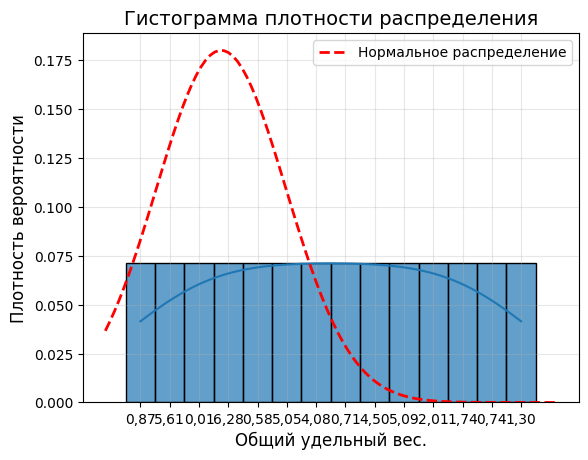

In [16]:
sns.histplot(df["2024"], bins=8, kde=True, stat='density', alpha=0.7)
plt.xlabel('Общий удельный вес.', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма плотности распределения', fontsize=14)
plt.grid(alpha=0.3)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, stats_innov['mean'], stats_innov['std'])
plt.plot(x, p, 'r--', linewidth=2, label='Нормальное распределение')

plt.legend()
plt.show()

Основные показатели выборки:
Объем выборки: 14, Средняя величина: 2.8
Разброс данных: 2.2, Центральное значение: 1.9

Интервальные оценки (95% доверительная вероятность):
Средняя величина: [1.5; 4.0] (аналитический)
Средняя величина: [1.7; 3.9] (ресемплинг)
Центральное значение: [0.8; 5.0]
Показатель разброса: [1.6; 3.6]
Мера изменчивости: [2.6; 12.7]


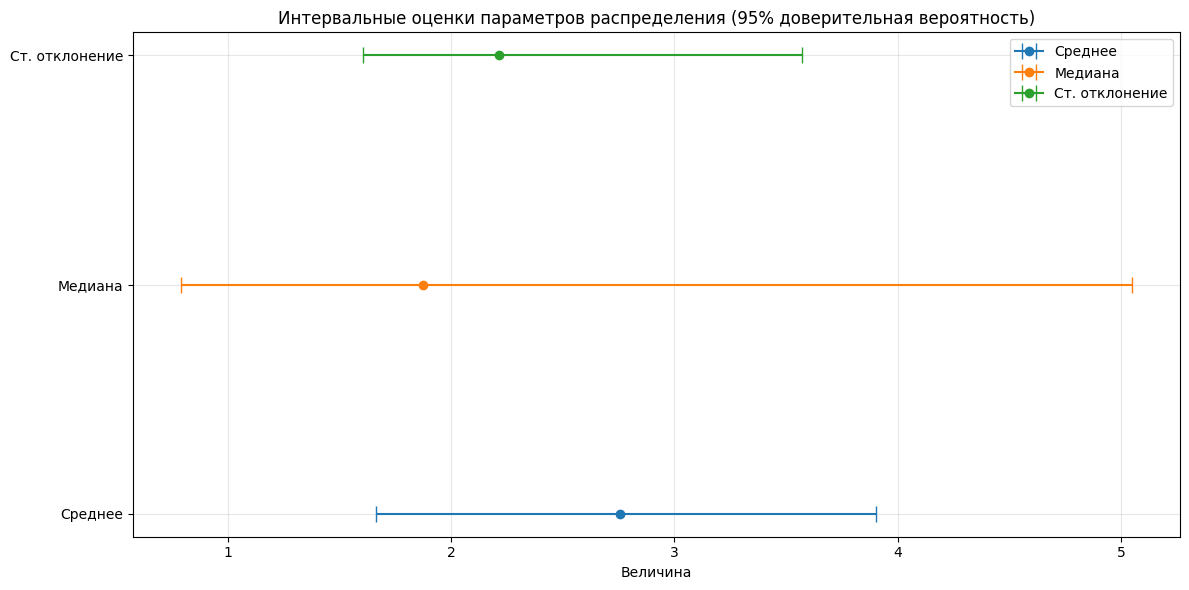

In [34]:
sample_size = len(df["2024"])
average_value = stats_innov["avg"]
sample_std = stats_innov["std"]
central_value = stats_innov["median"]

print("Основные показатели выборки:")
print(f"Объем выборки: {sample_size}, Средняя величина: {average_value:.1f}")
print(f"Разброс данных: {sample_std:.1f}, Центральное значение: {central_value:.1f}")

# Расчет интервалов оценки
t_value = stats.t.ppf(0.975, sample_size-1)
mean_se = sample_std / np.sqrt(sample_size)
mean_interval = [average_value - t_value * mean_se, average_value + t_value * mean_se]

chi2_high, chi2_low = stats.chi2.ppf(0.975, sample_size-1), stats.chi2.ppf(0.025, sample_size-1)
std_interval = [np.sqrt((sample_size-1) * sample_std**2 / chi2_high), 
                np.sqrt((sample_size-1) * sample_std**2 / chi2_low)]
variance_interval = [(sample_size-1) * sample_std**2 / chi2_high, 
                     (sample_size-1) * sample_std**2 / chi2_low]

# Метод повторных выборок
def resampling_intervals(dataset, iterations=10000):
    mean_estimates, median_estimates = [], []
    for _ in range(iterations):
        resample = np.random.choice(dataset, len(dataset), replace=True)
        mean_estimates.append(np.average(resample))
        median_estimates.append(np.median(resample))
    return (np.percentile(mean_estimates, [2.5, 97.5]),
            np.percentile(median_estimates, [2.5, 97.5]))

resampled_mean_ci, resampled_median_ci = resampling_intervals(data)

# Отображение результатов
print(f"\nИнтервальные оценки (95% доверительная вероятность):")
print(f"Средняя величина: [{mean_interval[0]:.1f}; {mean_interval[1]:.1f}] (аналитический)")
print(f"Средняя величина: [{resampled_mean_ci[0]:.1f}; {resampled_mean_ci[1]:.1f}] (ресемплинг)")
print(f"Центральное значение: [{resampled_median_ci[0]:.1f}; {resampled_median_ci[1]:.1f}]")
print(f"Показатель разброса: [{std_interval[0]:.1f}; {std_interval[1]:.1f}]")
print(f"Мера изменчивости: [{variance_interval[0]:.1f}; {variance_interval[1]:.1f}]")

# Графическое представление
fig, ax = plt.subplots(figsize=(12, 6))
estimated_params = ['Среднее', 'Медиана', 'Ст. отклонение']
confidence_ranges = [resampled_mean_ci, resampled_median_ci, std_interval]
point_estimators = [average_value, central_value, sample_std]

for idx, (param_name, confidence_range, point_est) in enumerate(zip(estimated_params, confidence_ranges, point_estimators)):
    left_error = point_est - confidence_range[0]
    right_error = confidence_range[1] - point_est
    ax.errorbar(point_est, idx, xerr=[[left_error], [right_error]],
                marker='o', capsize=6, label=param_name)

ax.set_yticks(range(3))
ax.set_yticklabels(estimated_params)
ax.set_xlabel('Величина')
ax.set_title('Интервальные оценки параметров распределения (95% доверительная вероятность)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


2013 год:
  Общая_сумма: 34.8
  Среднее: 2.5
  Медиана: 1.6
  Стандартное_отклонение: 2.2

2024 год:
  Общая_сумма: 38.6
  Среднее: 2.8
  Медиана: 1.9
  Стандартное_отклонение: 2.2


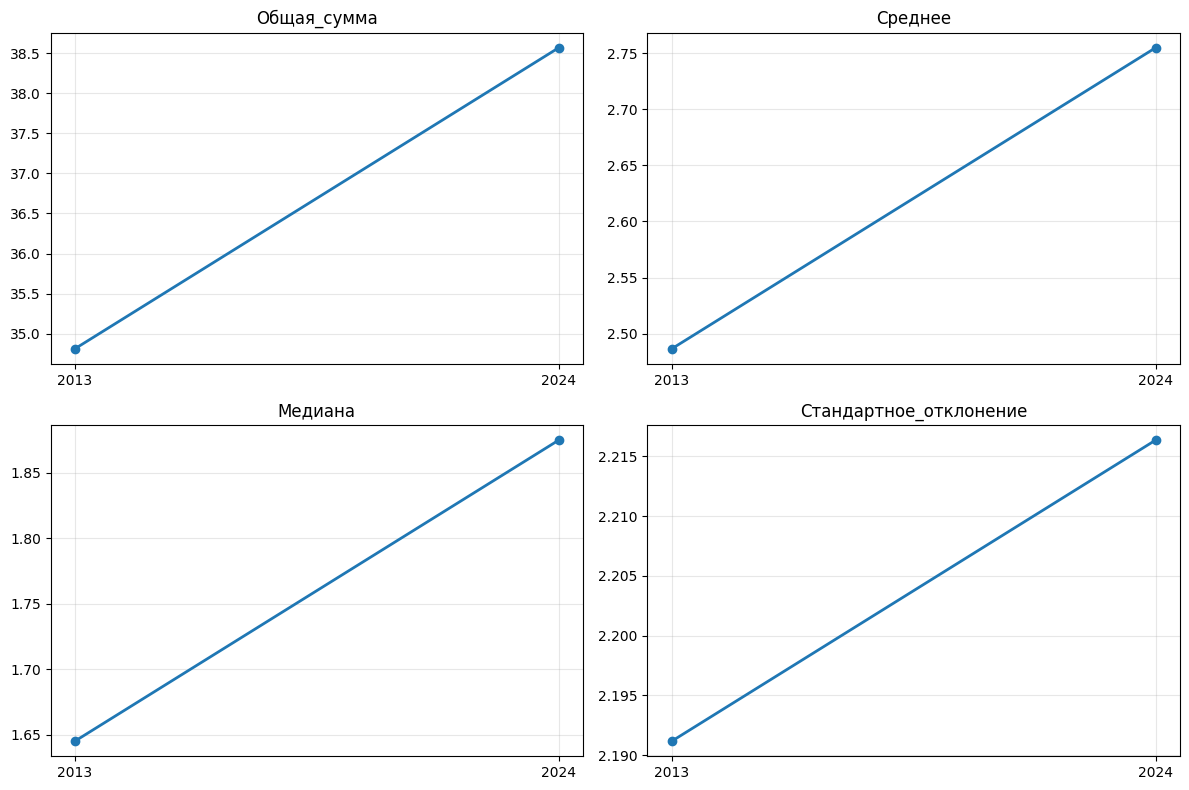

In [37]:
titles = ['Общая_сумма', 'Среднее', 'Медиана', 'Стандартное_отклонение']
data_2013 = [float(x.replace(',', '.')) for x in df["2013"]]
data_2013 = np.array(data_2013)
data_2024 = [float(x.replace(',', '.')) for x in df["2024"]]
data_2024 = np.array(data_2024)

def calculate_basic_stats(values, year_name):
    return {
        'Год': year_name,
        titles[0]: np.sum(values),
        titles[1]: np.mean(values),
        titles[2]: np.median(values),
        titles[3]: np.std(values, ddof=1)
    }

stats_2013 = calculate_basic_stats(data_2013, '2013')
stats_2024 = calculate_basic_stats(data_2024, '2024')
for stats in [stats_2013, stats_2024]:
    print(f"\n{stats['Год']} год:")
    print(f"  {titles[0]}: {stats[titles[0]]:_.1f}")
    print(f"  {titles[1]}: {stats[titles[1]]:_.1f}")
    print(f"  {titles[2]}: {stats[titles[2]]:_.1f}")
    print(f"  {titles[3]}: {stats[titles[3]]:_.1f}")

plt.figure(figsize=(12, 8))

for i, title in enumerate(titles, 1):
    plt.subplot(2, 2, i)
    values = [stats_2013[title], stats_2024[title]]
    plt.plot(['2013', '2024'], values, marker='o', linewidth=2)
    plt.title(title)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()